In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-performance/StudentPerformance.csv


In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv(r'/kaggle/input/student-performance/StudentPerformance.csv')
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [3]:
df.shape

(10000, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [5]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(127)

In [7]:
df.drop_duplicates()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [8]:
df = df.loc[:3000]

<Axes: ylabel='Sample Question Papers Practiced'>

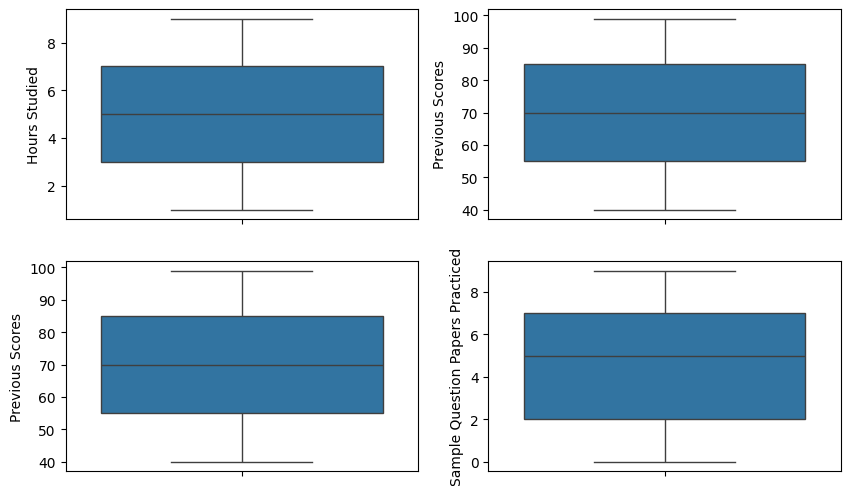

In [9]:
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
sns.boxplot(df["Hours Studied"])
plt.subplot(2,2,2)
sns.boxplot(df["Previous Scores"])
plt.subplot(2,2,3)
sns.boxplot(df["Previous Scores"])
plt.subplot(2,2,4)
sns.boxplot(df["Sample Question Papers Practiced"])


<Axes: xlabel='Performance Index', ylabel='Count'>

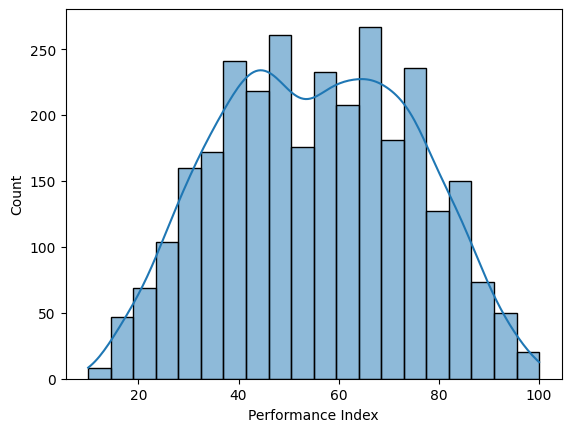

In [10]:
sns.histplot(df,x = "Performance Index",kde=True , bins = 20)

<Axes: xlabel='Previous Scores', ylabel='Performance Index'>

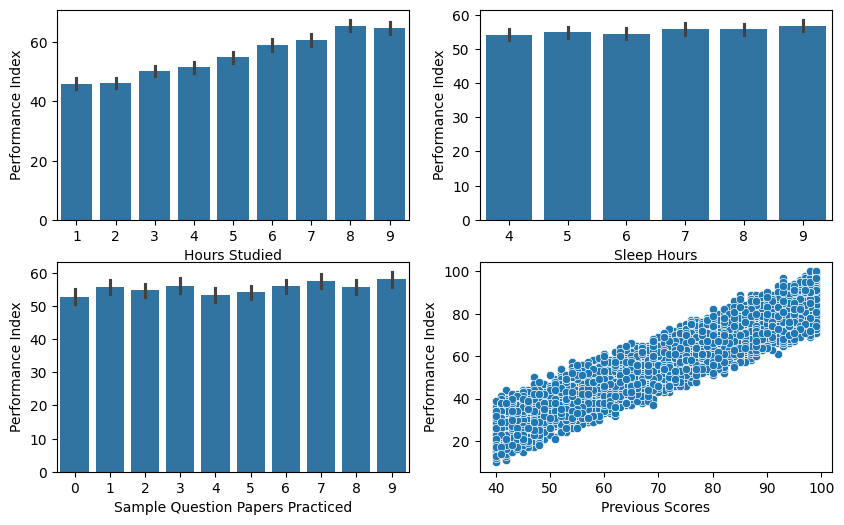

In [11]:
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
sns.barplot(df,x = "Hours Studied",y="Performance Index")
plt.subplot(2,2,2)
sns.barplot(df,x="Sleep Hours", y ="Performance Index")
plt.subplot(2,2,3)
sns.barplot(df,x="Sample Question Papers Practiced", y ="Performance Index")
plt.subplot(2,2,4)
sns.scatterplot(df,x="Previous Scores", y ="Performance Index")

<Axes: xlabel='Extracurricular Activities', ylabel='Performance Index'>

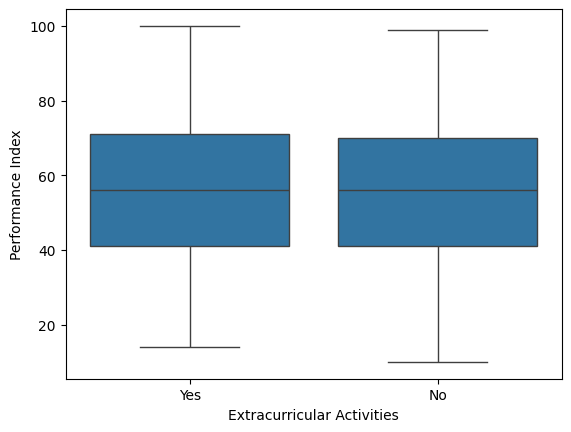

In [12]:
sns.boxplot(df,x = "Extracurricular Activities",y = "Performance Index")

In [13]:
df.groupby("Extracurricular Activities")["Performance Index"].mean()

Extracurricular Activities
No     55.227485
Yes    55.640479
Name: Performance Index, dtype: float64

In [14]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [15]:
df["Extracurricular Activities"] = df["Extracurricular Activities"].map({"Yes":1, "No":0})

In [16]:
df.astype(int)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91
1,4,82,0,4,2,65
2,8,51,1,7,2,45
3,5,52,1,5,2,36
4,7,75,0,8,5,66
...,...,...,...,...,...,...
2996,3,88,0,9,1,67
2997,3,84,1,5,2,63
2998,1,48,1,5,3,18
2999,6,54,0,6,0,43


In [17]:
df.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities            int64
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

In [18]:
df.sample()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
1593,9,46,1,4,2,41.0


In [19]:
X = df.drop(columns ="Performance Index",axis=1)
y = df["Performance Index"]

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [21]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [22]:
from sklearn.linear_model import LinearRegression
model_linear = LinearRegression()
model_linear.fit(X_train,y_train)

LinearRegression()

In [23]:
y_pred = model_linear.predict(X_test)


In [24]:
X_train.shape

(2010, 5)

In [25]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print("MAE = ", mean_absolute_error(y_test,y_pred))
print("MSA = ", mean_squared_error(y_test,y_pred))
print("RMSE = ", np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2 score = ",r2_score(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("adjusted_r2 score = ",1 - ((1 - r2)*(2010 - 1))/(2010 - 1 - 5))

MAE =  1.6201556168171225
MSA =  4.166577044049811
RMSE =  2.041219499233194
r2 score =  0.9881882146969404
adjusted_r2 score =  0.9881587441747272


In [26]:
train_score = r2_score(y_train, model_linear.predict(X_train))
test_score = r2_score(y_test, y_pred)

print(f"Train R2: {train_score}")
print(f"Test R2: {test_score}")

Train R2: 0.9887577286315654
Test R2: 0.9881882146969404


In [27]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model_linear, X, y, cv=5)
print("Average Cross-Val Score:", scores.mean())

Average Cross-Val Score: 0.9885078971797865


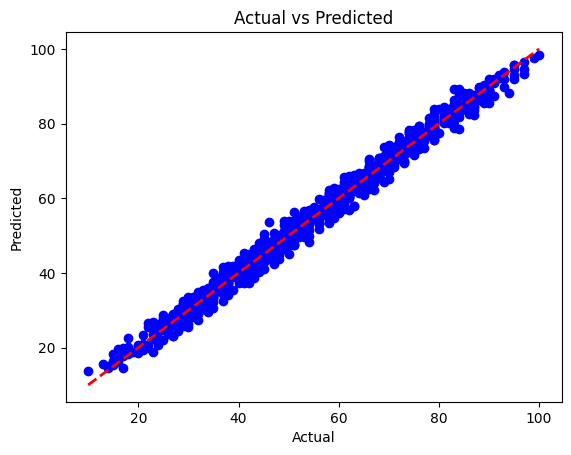

In [28]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()],  'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [52]:
import joblib
joblib.dump(model_linear,"st_model.pkl")
joblib.dump(scaler, 'st_scaler.pkl')

['st_scaler.pkl']